Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
   Order Date      Sales
0   11/8/2016   261.9600
1   11/8/2016   731.9400
2  10/11/2015   957.5775
3    6/9/2014    48.8600
4    6/9/2014  1706.1840


<ipython-input-2-97129d5ffedb>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


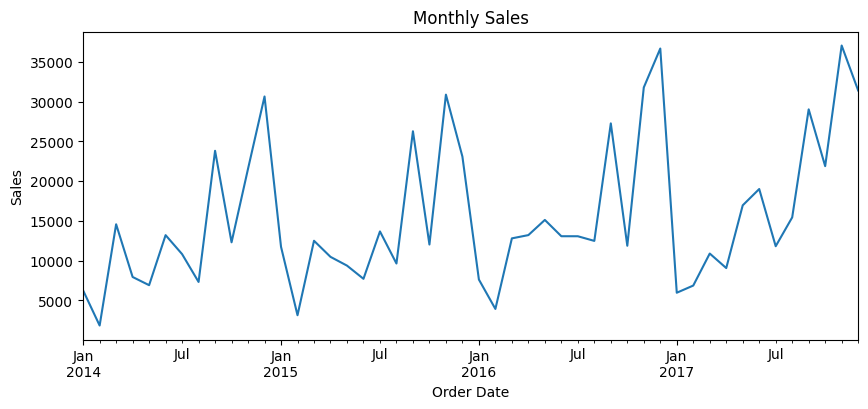

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -494.372
Date:                Sat, 12 Apr 2025   AIC                            994.745
Time:                        07:00:58   BIC                           1000.295
Sample:                    01-31-2014   HQIC                           996.833
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2602      0.283      0.919      0.358      -0.295       0.815
ma.L1         -0.8855      0.162     -5.475      0.000      -1.202      -0.568
sigma2      9.203e+07   1.07e-09   8.61e+16      0.0

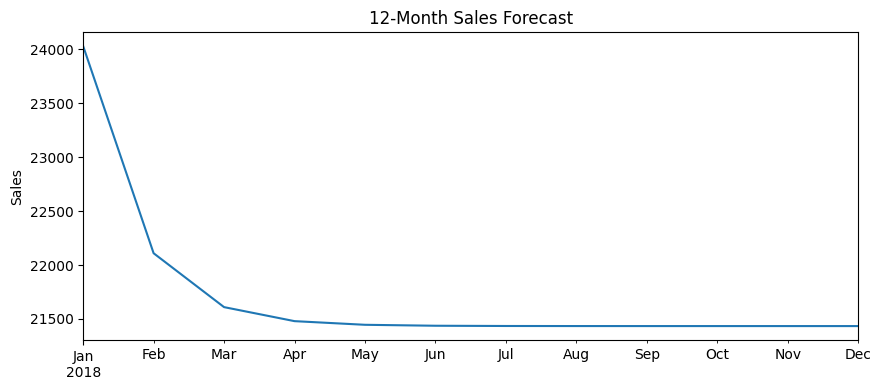

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('/content/Super_Store_data.csv', encoding='ISO-8859-1')
print(df.columns)
print(df[['Order Date', 'Sales']].head())
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
monthly_sales = df['Sales'].resample('M').sum()
monthly_sales.plot(title='Monthly Sales', figsize=(10, 4))
plt.ylabel('Sales')
plt.show()
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
forecast = model_fit.forecast(steps=12)
forecast.plot(title='12-Month Sales Forecast', figsize=(10, 4))
plt.ylabel('Sales')
plt.show()
